# The Case Study

You are working at a technology-oriented company. The Human Resources (HR) department is about to start a
pre-emptive program towards mitigation of mental health issues amongst the company’s staff. HR has contacted
you as one of the company's data scientists to support the program with quantitative analyses. You are provided
with the results of a survey, which has been conducted amongst technology-oriented employees and which is
considered representative for your company as well. The challenge in working with this data set lies in its high
dimensionality and complexity so that it is not straightforward to interpret and transfer the results to the
structures of your organization. Another challenge in working with this data is missing values and nonstandardized textual inputs. HR has asked you to provide a better overview over the data in ways which are more
easily interpretable and transferable to improvements at your workplace. The goal is to categorize participants of
the survey according to their answers and to provide visualizations supporting the interpretation of these clusters.

These visualizations should convey a perspective onto the data set, which is reduced in complexity and
dimensionality and yet preserving the main characteristics of the whole available data. You should also provide
insight into each individual identified cluster of participants and their main characteristics. Ultimately, this will help to identify potential points of leverage for the planned program, which will be addressed with targeted
measures.

# Imports

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import category_encoders as ce
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Overview

In [3]:
df = pd.read_csv('/Users/emre/Documents/IU Data Science/2022/3 Machine Learning - Unsupervised Project/archive/mental-heath-in-tech-2016_20161114.csv')

In [4]:
df.head(3)

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you know local or online resources to seek help for a mental health disorder?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?.1,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a menta

# Cleaning Data 

After an initial overview of the data, the first hurdle that stands out are the column names which are full questions instead of short and workable column names. In the first steps the columns will be renamed.

## Rename all columns to make further investigation easier

In order to optimize the truncation of the questions here are some abbreviations:
- mh = mental health
- ph = physical health
- neg = negative
- pos = pos
- diag = diagnosed
- prev = previous

In [5]:
columns_new = [
    'self_employed',
    'company_size',
    'tech_comp_flag',
    'tech_role_flag',
    'mh_coverage_flag',
    'mh_coverage_awareness_flag',
    'mh_employer_discussion_flag',
    'mh_resources_provided_flag',
    'mh_anonimity_flag',
    'mh_sick_leave',
    'mh_discussion_neg_impact',
    'ph_discussion_neg_impact',
    'mh_discussion_coworkers',
    'mh_discussion_supervisor',
    'mh_versus_ph_employer',
    'mh_consequence_coworkers',
    'mh_coverage_flag2',
    'mh_online_resources_flag',
    'mh_diagnosed&reveal_clients_flag',
    'mh_diagnosed&reveal_clients_impact',
    'mh_diagnosed&reveal_coworkers_flag',
    'mh_coworkers_reveal_neg_impact',
    'mh_productivity_impact',
    'mh_productivity_impact_percentage',
    'prev_employers_flag',
    'prev_employers_mh_benefits',
    'prev_employers_mh_benefits_awareness',
    'prev_employers_mh_discussion',
    'prev_employers_mh_resources',
    'prev_employers_mh_anonimity',
    'prev_employers_mh_discuss_neg_consequences',
    'prev_employers_ph_discuss_neg_consequences',
    'prev_employers_mh_discussion_cowork',
    'prev_employers_mh_discussion_supervisor',
    'prev_employers_mh_importance_employer',
    'prev_employers_mh_consequences_coworkers',
    'future_employers_ph_specification',
    'why/why_not',
    'future_employers_mh_specification',
    'why/why_not2',
    'mh_hurt_on_career',
    'mh_neg_view_coworkers',
    'mh_sharing_friends/fam_flag',
    'mh_bad_response_workplace',
    'mh_for_others_bad_response_workplace',
    'mh_family_history',
    'mh_disorder_past',
    'mh_disorder_current',
    'yes_what_diag',
    'maybe_whats_your_diag',
    'mh_diag_professional',
    'yes_condition_diag',
    'mh_sought_professional_treatment',
    'mh_effective_treat_impact_on_work',
    'mh_not_effective_treat_impact_on_work',
    'age',
    'sex',
    'country_live',
    'live_us_teritory',
    'country_work',
    'work_us_teritory',
    'work_position',
    'remote_flag'
]

In [6]:
df.columns = columns_new

In [7]:
df.columns

Index(['self_employed', 'company_size', 'tech_comp_flag', 'tech_role_flag',
       'mh_coverage_flag', 'mh_coverage_awareness_flag',
       'mh_employer_discussion_flag', 'mh_resources_provided_flag',
       'mh_anonimity_flag', 'mh_sick_leave', 'mh_discussion_neg_impact',
       'ph_discussion_neg_impact', 'mh_discussion_coworkers',
       'mh_discussion_supervisor', 'mh_versus_ph_employer',
       'mh_consequence_coworkers', 'mh_coverage_flag2',
       'mh_online_resources_flag', 'mh_diagnosed&reveal_clients_flag',
       'mh_diagnosed&reveal_clients_impact',
       'mh_diagnosed&reveal_coworkers_flag', 'mh_coworkers_reveal_neg_impact',
       'mh_productivity_impact', 'mh_productivity_impact_percentage',
       'prev_employers_flag', 'prev_employers_mh_benefits',
       'prev_employers_mh_benefits_awareness', 'prev_employers_mh_discussion',
       'prev_employers_mh_resources', 'prev_employers_mh_anonimity',
       'prev_employers_mh_discuss_neg_consequences',
       'prev_employers

After changing the column names to more readable and shorter versions, we can easily view the values and types of entries next.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 63 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   self_employed                               1433 non-null   int64  
 1   company_size                                1146 non-null   object 
 2   tech_comp_flag                              1146 non-null   float64
 3   tech_role_flag                              263 non-null    float64
 4   mh_coverage_flag                            1146 non-null   object 
 5   mh_coverage_awareness_flag                  1013 non-null   object 
 6   mh_employer_discussion_flag                 1146 non-null   object 
 7   mh_resources_provided_flag                  1146 non-null   object 
 8   mh_anonimity_flag                           1146 non-null   object 
 9   mh_sick_leave                               1146 non-null   object 
 10  mh_discussio

There are two things that immediately stand out:
1. The data type can be improved by adjusting objects, integers, and floats accordingly, and
2. there are a lot of missing values in this dataset

Let's get a visual on the missing values first.

## Dealing with missing values (NaN)

Short summary of this section:
- Overview missing values
- Clean data from self-employed survey-takers & columns for self-employed survey takers
- Impute `tech_role_flag` with `work_position`
- Dropping columns with more than 50% of NaN values
- Impute all remaining NaN values with mode per column

### Overview missing values

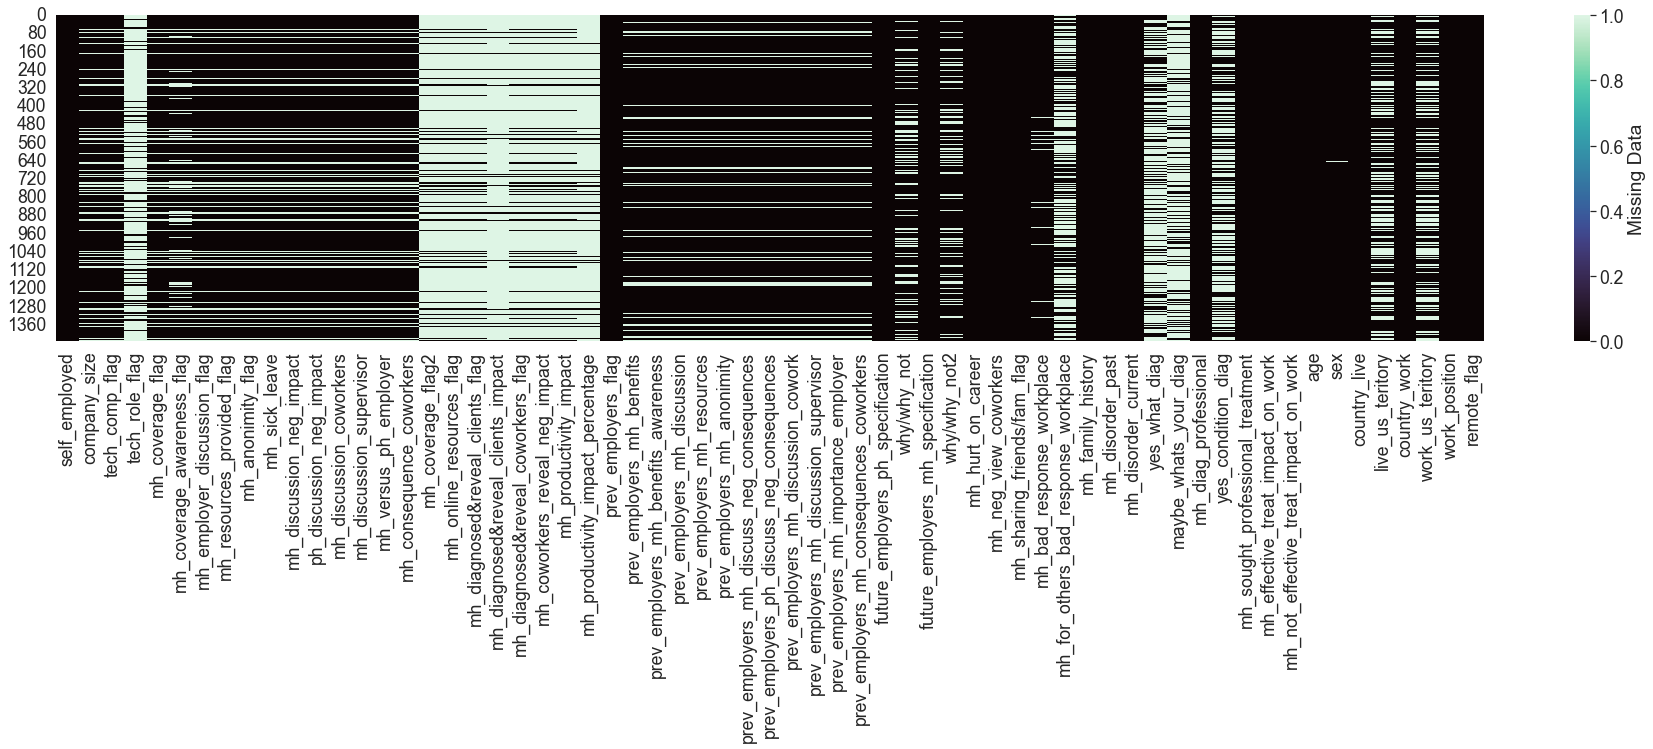

In [9]:
sns.set(font_scale=1.6)
plt.figure(figsize=(32,6))
sns.heatmap(df.isna(),
            cmap='mako',
            cbar_kws={'label': 'Missing Data'})
plt.show()

# Saving the graph as png for later use
# plt.savefig("Missing_values_as_heatmap.png", dpi=300, format="png")

This graphic shows clearly that a lot of data is missing especially in the section after the second mental health coverage question comes up. It is going to be important to figure out why this section in particular wasn't answered by participants.
One of the striking features of this survey is that the question of mental health healthcare coverge appears twice. The visualization also shows that there is a inverted relationship between answering the first part (`company_size` to `mh_consequence_coworkers`) compared to the second part (`mh_coverage_flag2` to `mh_productivity_impact_percentage`) of healthcare questions.

Our HR is only interested in employees. That's why we can drop all self-employed survey takers.

### Clean data from self-employed survey-takers & columns for self-employed survey takers

In [10]:
# Count all employees survey takers(survey takers who are employed answered with 0 in the survey)
mask_employed = df.self_employed == 0

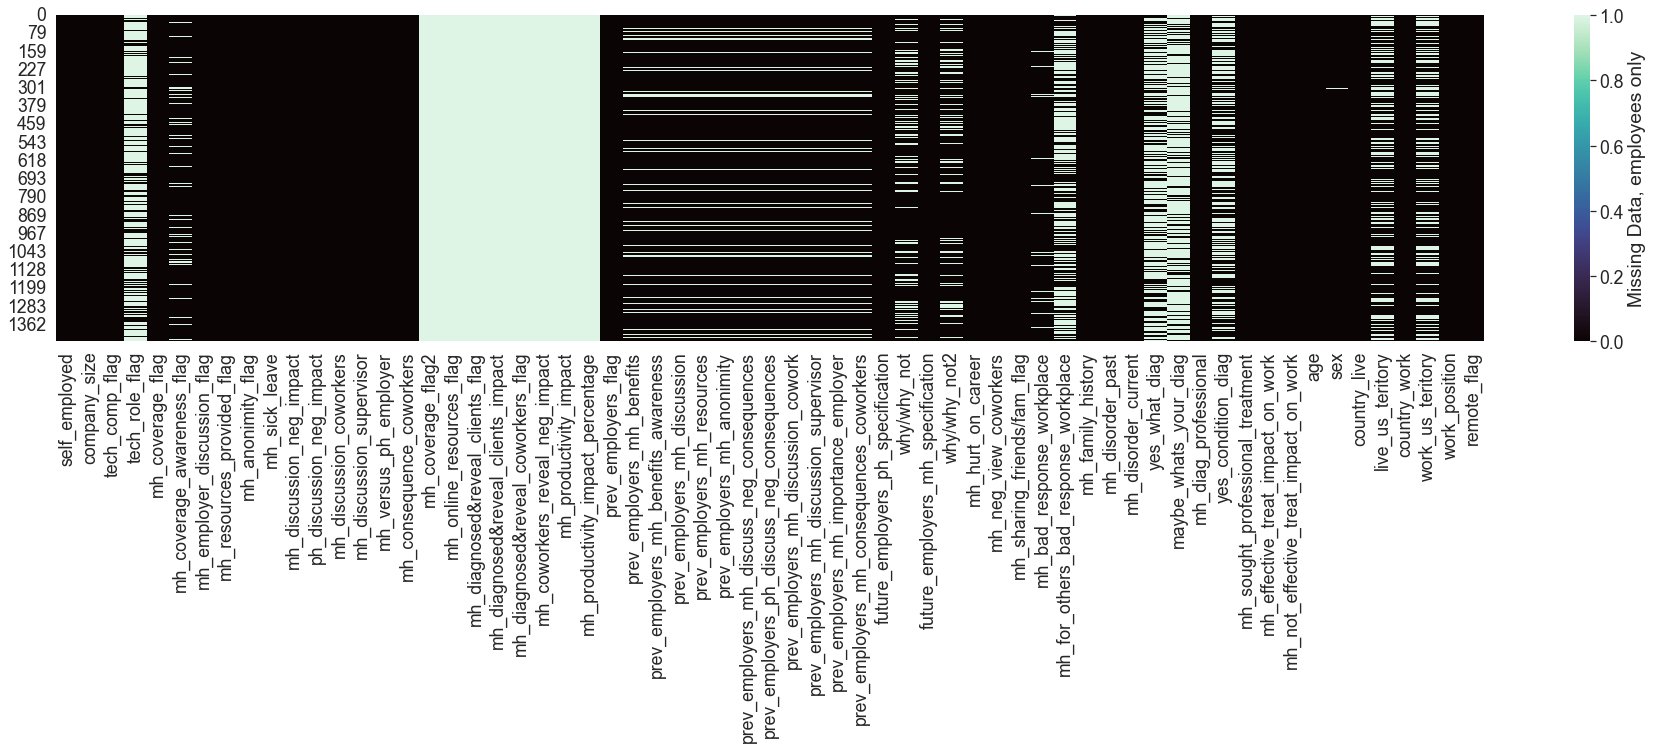

In [11]:
plt.figure(figsize=(32,6))
sns.heatmap(df[mask_employed].isna(),
            cmap='mako',
            cbar_kws={'label': 'Missing Data, employees only'})
plt.show()
# plt.savefig("Missing_values_employed.png", dpi=300, format="png")

Because our company wants to analyze the mental health of other tech companies, all self-employed survey takers and the section `mh_coverage_flag2` to `mh_productivity_impact_percentage` can be dropped.

In [12]:
# Drop all rows having self-employed survey takers
df.drop(df[df.self_employed == 1].index, inplace=True)

# Drop the column `self_employed`
df.drop('self_employed',axis=1,inplace=True)

# Drop all columns referencing answer by only self-employed survey takers
df.drop(df.loc[:,'mh_coverage_flag2':'mh_productivity_impact_percentage'],axis=1,inplace=True)

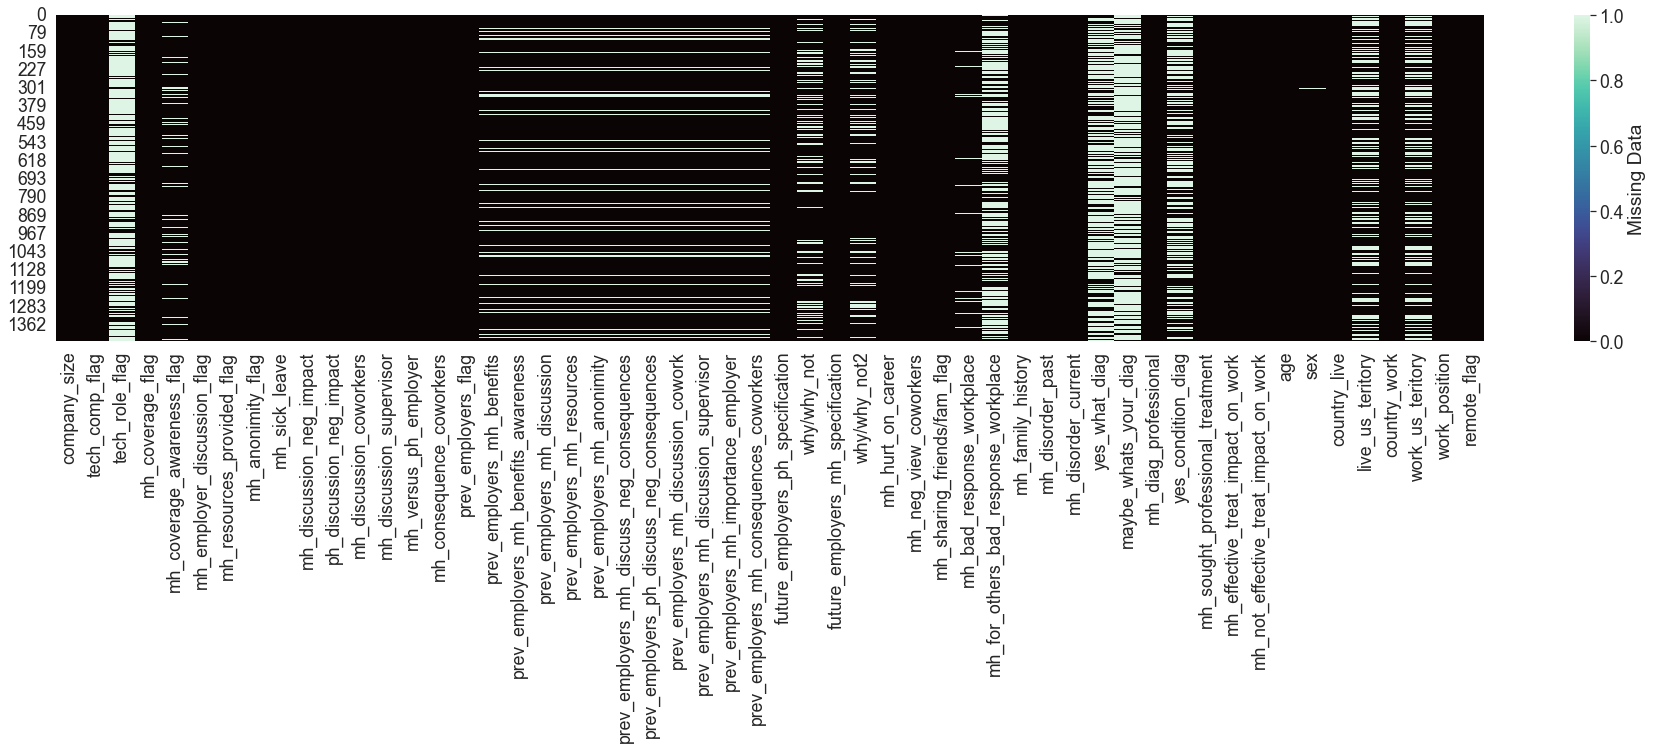

In [13]:
sns.set(font_scale=1.6)
plt.figure(figsize=(32,6))
sns.heatmap(df.isna(),
            cmap='mako',
            cbar_kws={'label': 'Missing Data'})
plt.show()
# plt.savefig("Missing_values_cleaned_from_self-employed.png", dpi=300, format="png")

In [14]:
df.shape

(1146, 54)

The dataframe has been reduced to 1146 rows and 54 columns (originally 1433 rows & 64 columns)

### Impute `tech_role_flag` based on `work_position`
The column `tech_role_flag` was omitted by the majority of survey takers whereas `work_position` wasn't. Based on the latter column, we can impute the former column. This is possible bc `work_position` has zero NaN values.

In [15]:
df.work_position.value_counts().nlargest(15)

Back-end Developer                                             238
Front-end Developer                                            116
Other                                                           99
Supervisor/Team Lead                                            60
Back-end Developer|Front-end Developer                          58
DevOps/SysAdmin                                                 48
Front-end Developer|Back-end Developer                          33
Support                                                         32
Executive Leadership                                            30
Dev Evangelist/Advocate                                         27
Designer                                                        18
Front-end Developer|Designer                                    17
Supervisor/Team Lead|Back-end Developer                         17
Back-end Developer|DevOps/SysAdmin                              16
Supervisor/Team Lead|Back-end Developer|Front-end Developer   

In [16]:
# Create mask to check for all `work_position` which contain a tech-role
mask_tech_role_flag = df.work_position.str.contains('Back-end|Front-end|DevOps|SysAdmin|Developer')

In [17]:
# Replace tech roles with "Yes" and non-tech-roles with "No"
df.loc[mask_tech_role_flag] = df.loc[mask_tech_role_flag].fillna("Yes")
df.loc[mask_tech_role_flag != True] = df.loc[mask_tech_role_flag != True].fillna("No")

# Replace 1/0 values with ("Yes"/"No")
df.tech_role_flag.replace({1:"Yes",0:"No"},inplace=True)

In [18]:
df.tech_role_flag.value_counts()

Yes    892
No     254
Name: tech_role_flag, dtype: int64

### Dropping columns with more than 50% of NaN values.

The remaining columns with more than 50% of missing values will not be useful and cannot be imputed in a effective manner. Dropping following columns:

- `why/why_not`
- `why/why_not2`
- `mh_sought_professional_treatment`
- `mh_for_others_bad_response_workplace`
- `yes_what_diag`
- `maybe_whats_your_diag`
- `yes_condition_diag`
- `live_us_teritory`
- `work_us_teritory`

In [19]:
df.drop(['why/why_not','why/why_not2','mh_sought_professional_treatment',
         'yes_what_diag','maybe_whats_your_diag','live_us_teritory','work_us_teritory', 'mh_for_others_bad_response_workplace',
         'yes_condition_diag'], axis=1,inplace=True)

### Impute remaining NaN with most frequent values per column (mode) 

In [20]:
# Create list with all imputable columns
col_w_nan = df.columns[df.isna().any()].tolist()

# Loop over imputable columns and replace NaN values with most frequent values (Mode)
for n in col_w_nan:
    df[n] = df[n].fillna(df[n].mode()[0])

<Figure size 1152x1152 with 0 Axes>

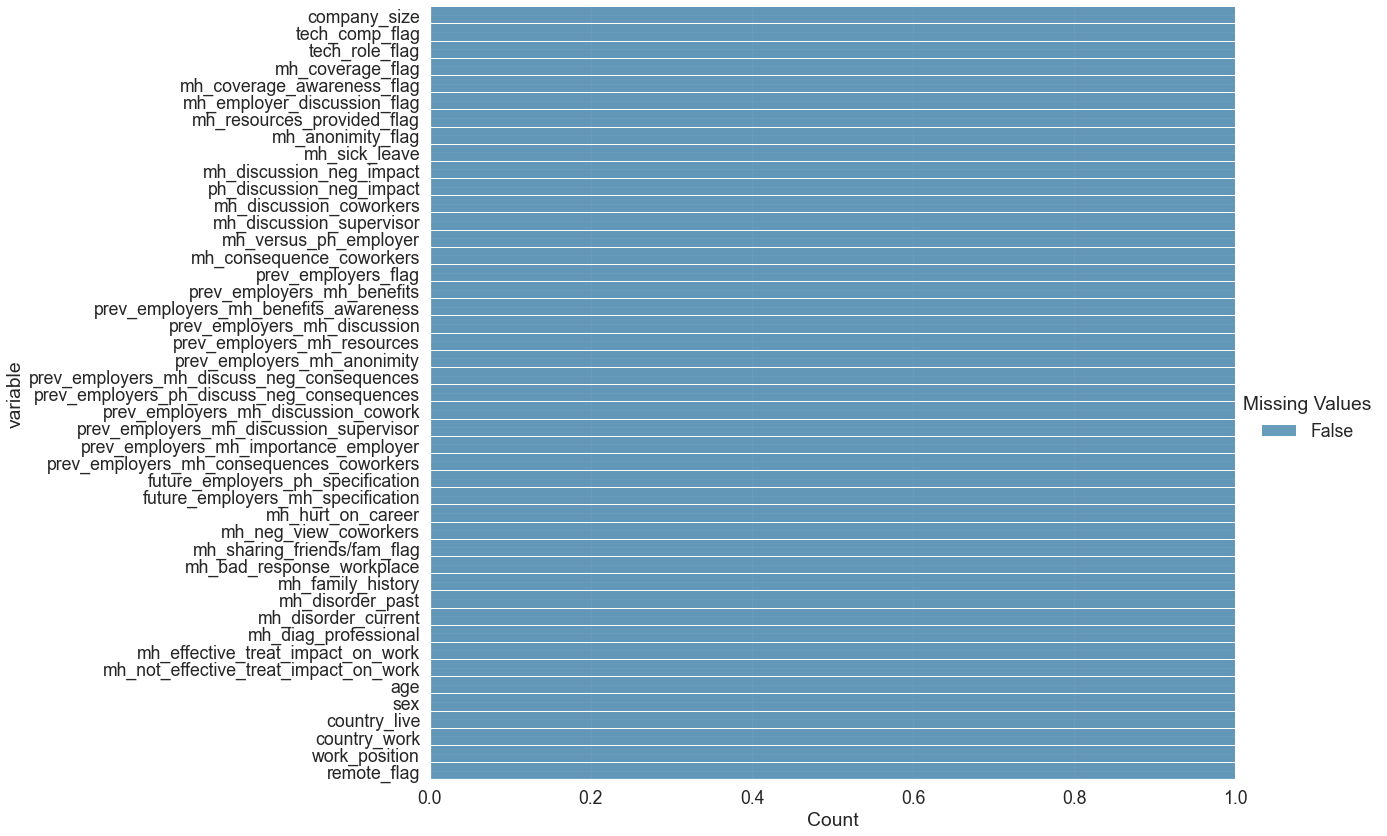

In [21]:
plt.figure(figsize=(16,16))
ax1 = sns.displot(
        data=df.isna().melt(value_name="missing"),
        y="variable",
        hue="missing",
        multiple="fill",
        aspect=1.5,
        height=12,
        palette="mako",
)

ax1._legend.set_title("Missing Values")
plt.show()

There are no more NaN values in the dataframe!

## Adjust column entries & types

#### Check number of answers 

In [22]:
number_of_answers_dict = {}
for n in df.columns:
    number_of_answers_dict[n] = len(df[n].value_counts())

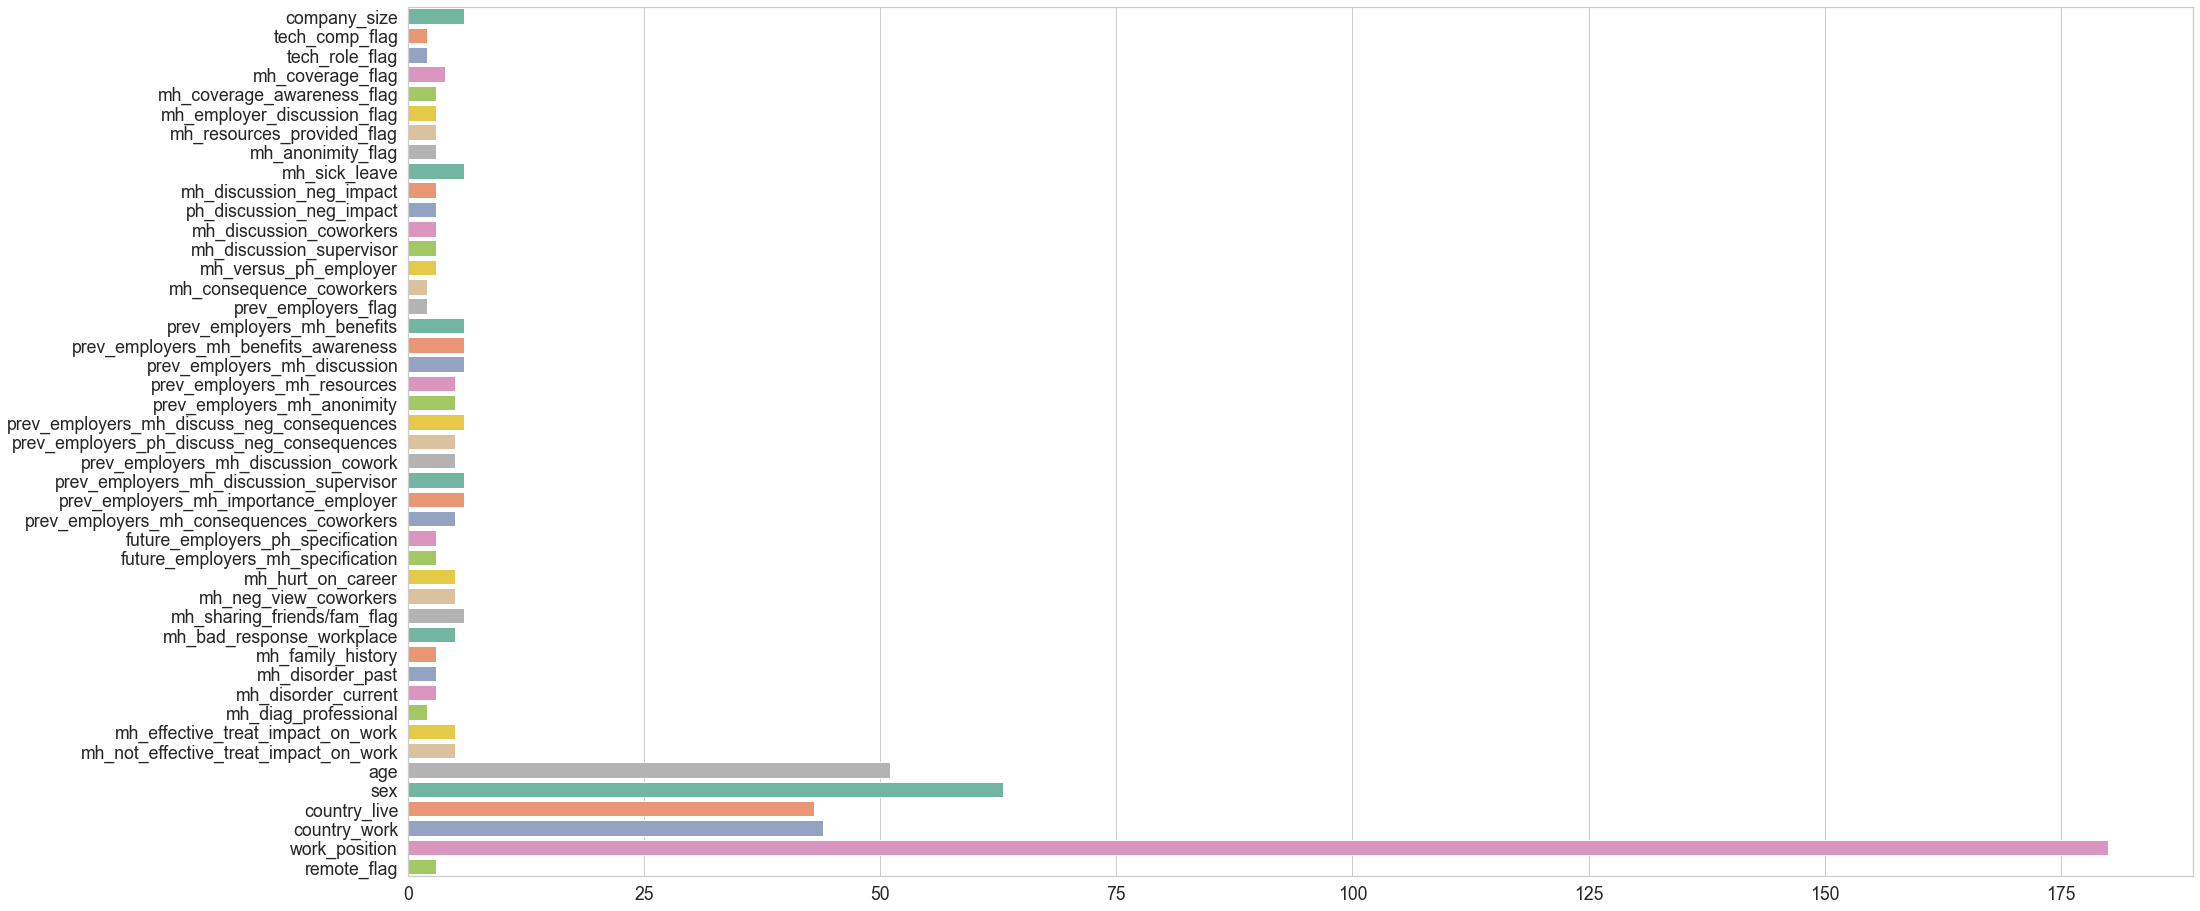

In [23]:
plt.figure(figsize=(32,16))
sns.set_style("whitegrid")
keys = list(number_of_answers_dict.keys())
vals = list(number_of_answers_dict.values())
sns.barplot(x=vals, y=keys, palette="Set2")
plt.show()
# plt.savefig("Number_of_answers_per_column.png", dpi=300, format="png")

#### Standartize gender spectrum

In [24]:
df.sex.value_counts()

Male                                                       505
male                                                       195
Female                                                     121
female                                                      79
M                                                           69
m                                                           56
F                                                           24
f                                                           20
Female                                                       6
Male                                                         5
non-binary                                                   4
woman                                                        4
male                                                         2
Male (cis)                                                   2
Agender                                                      2
Woman                                                  

In [25]:
male = ['Male', 'male', 'Male ', 'M', 'm','man', 'Cis male', 'Male.', 'male 9:1 female, roughly', 'Male (cis)',
        'Man', 'Sex is male','cis male', 'Malr', 'Dude', 
        "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
        'mail', 'M|', 'Male/genderqueer', 'male ', 'Cis Male', 'Male (trans, FtM)', 'cisdude', 'cis man', 'MALE']

female = ['Female', 'female', 'I identify as female.', 'female ','Female assigned at birth ', 'F', 'Woman',
          'fm', 'f', 'Cis female ', 'Transitioned, M2F', 'Genderfluid (born female)', 
          'Female or Multi-Gender Femme', 'Female ', 'woman', 'female/woman','Cisgender Female', 'fem', 
          'Female (props for making this a freeform field, though)',' Female', 'Cis-woman', 
          'female-bodied; no feelings about gender','AFAB']

other = ['Bigender', 'non-binary', 'Other/Transfeminine', 'Androgynous', 'Other', 'nb masculine',
         'none of your business', 'genderqueer', 'Human', 'Genderfluid','Enby', 'genderqueer woman', 'mtf',
         'Queer', 'Agender', 'Fluid','Nonbinary', 'human', 'Unicorn', 'Genderqueer','Genderflux demi-girl',
         'Transgender woman','Yes','No']

df["sex"].replace(to_replace=male, value='male', inplace=True)
df["sex"].replace(to_replace=female, value='female',inplace=True)
df["sex"].replace(to_replace=other, value='other',inplace=True)

In [26]:
df.sex.value_counts()

male      849
female    272
other      25
Name: sex, dtype: int64

#### Handle age outliers
The age column has some huge outliers shown by following graph:

In [27]:
df.age.describe()

count    1146.000000
mean       33.655323
std        11.703277
min         3.000000
25%        28.000000
50%        32.000000
75%        38.000000
max       323.000000
Name: age, dtype: float64

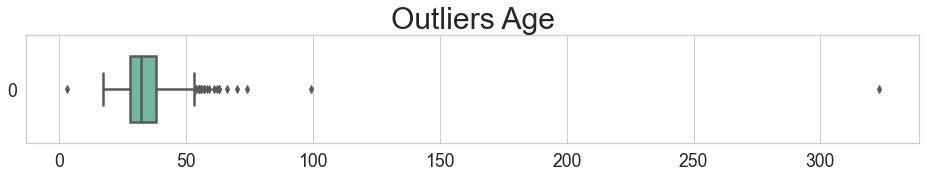

In [28]:
plt.figure(figsize=(16,2))
sns.set_style("whitegrid")
ax = sns.boxplot(data=df.age, palette='Set2',orient='h',linewidth=2.5,width=.6 )
ax.set_title('Outliers Age', fontsize=30)
plt.show()

There are just two outliers in this column, however for future reference, all ages smaller than 14 and bigger than 120 will be replaced by the average age.

In [29]:
# Calculate the average age
mean_age = df.age.mean()

# Apply funciton which iterates over every entry in the age column and replaces all values
# which are bigger than 120 and smaller than 14.
df.age = df.age.apply(lambda x: mean_age if x>=120 or x<=14 else x)

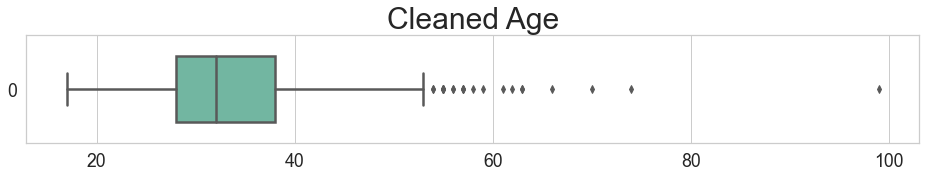

In [30]:
plt.figure(figsize=(16,2))
sns.set_style("whitegrid")
ax = sns.boxplot(data=df.age, palette='Set2',orient='h',linewidth=2.5,width=.6 )
ax.set_title('Cleaned Age', fontsize=30)
plt.show()

No more outliers in `age` column.

In [31]:
number_of_answers_dict = {}
for n in df.columns:
    number_of_answers_dict[n] = len(df[n].value_counts())

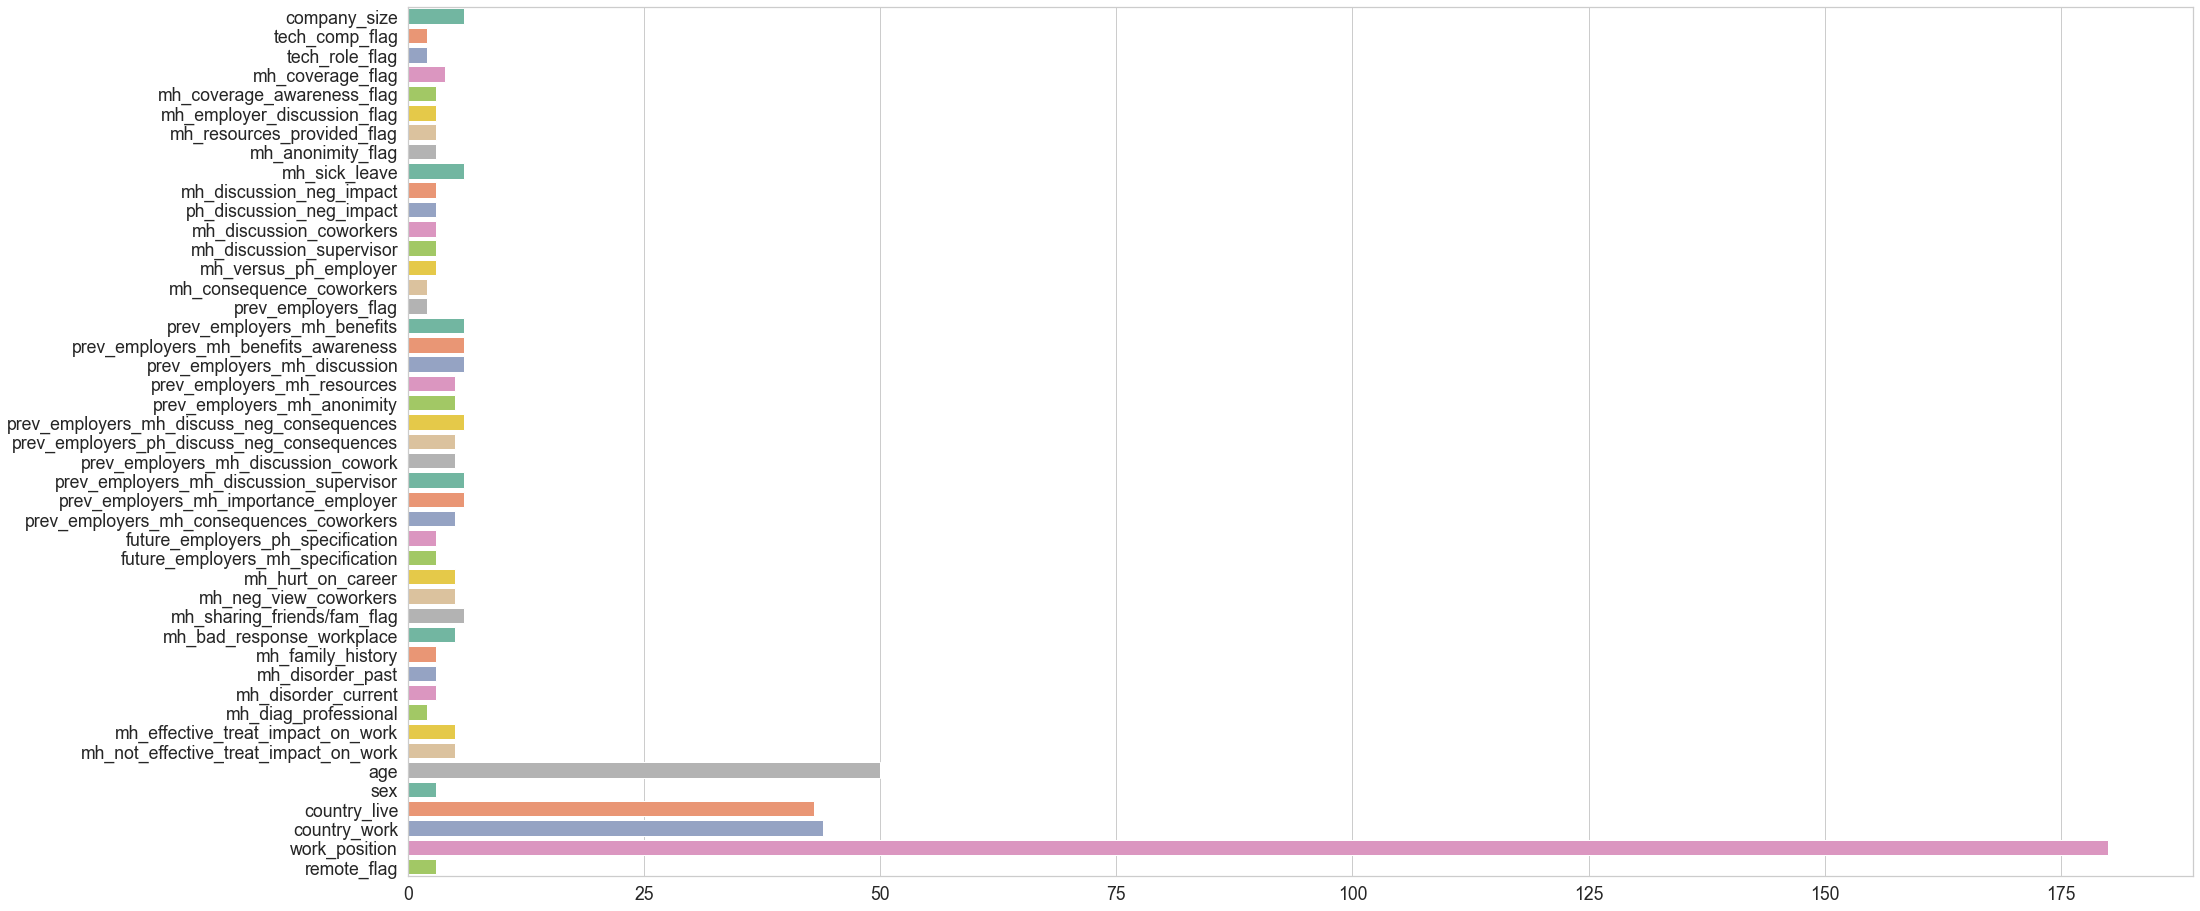

In [32]:
plt.figure(figsize=(32,16))
sns.color_palette("rocket", as_cmap=True)
keys = list(number_of_answers_dict.keys())
vals = list(number_of_answers_dict.values())
sns.barplot(x=vals, y=keys, palette="Set2")
plt.show()
# plt.savefig("Number_of_answers_per_column.png", dpi=300, format="png")

#### Drop all countries in which the count is smaller than 20

In [33]:
mask_country_work = df.country_work.isin(["United States of America", "United Kingdom", "Canada", "Germany", "Netherlands",
                     "Australia"])
df.drop(df[mask_country_work == False].index, inplace=True)

mask_country_live = df.country_live.isin(["United States of America", "United Kingdom", "Canada", "Germany", "Netherlands",
                     "Australia"])
df.drop(df[mask_country_live == False].index, inplace=True)

#### Rename countries

In [34]:
# Renaming of United States of America and United Kingdom for readability in visualizations later
df.country_work.replace({"United States of America":"USA", "United Kingdom": "UK"}, inplace=True)
df.country_live.replace({"United States of America":"USA", "United Kingdom": "UK"}, inplace=True)

#### Change `company size`'s last segment

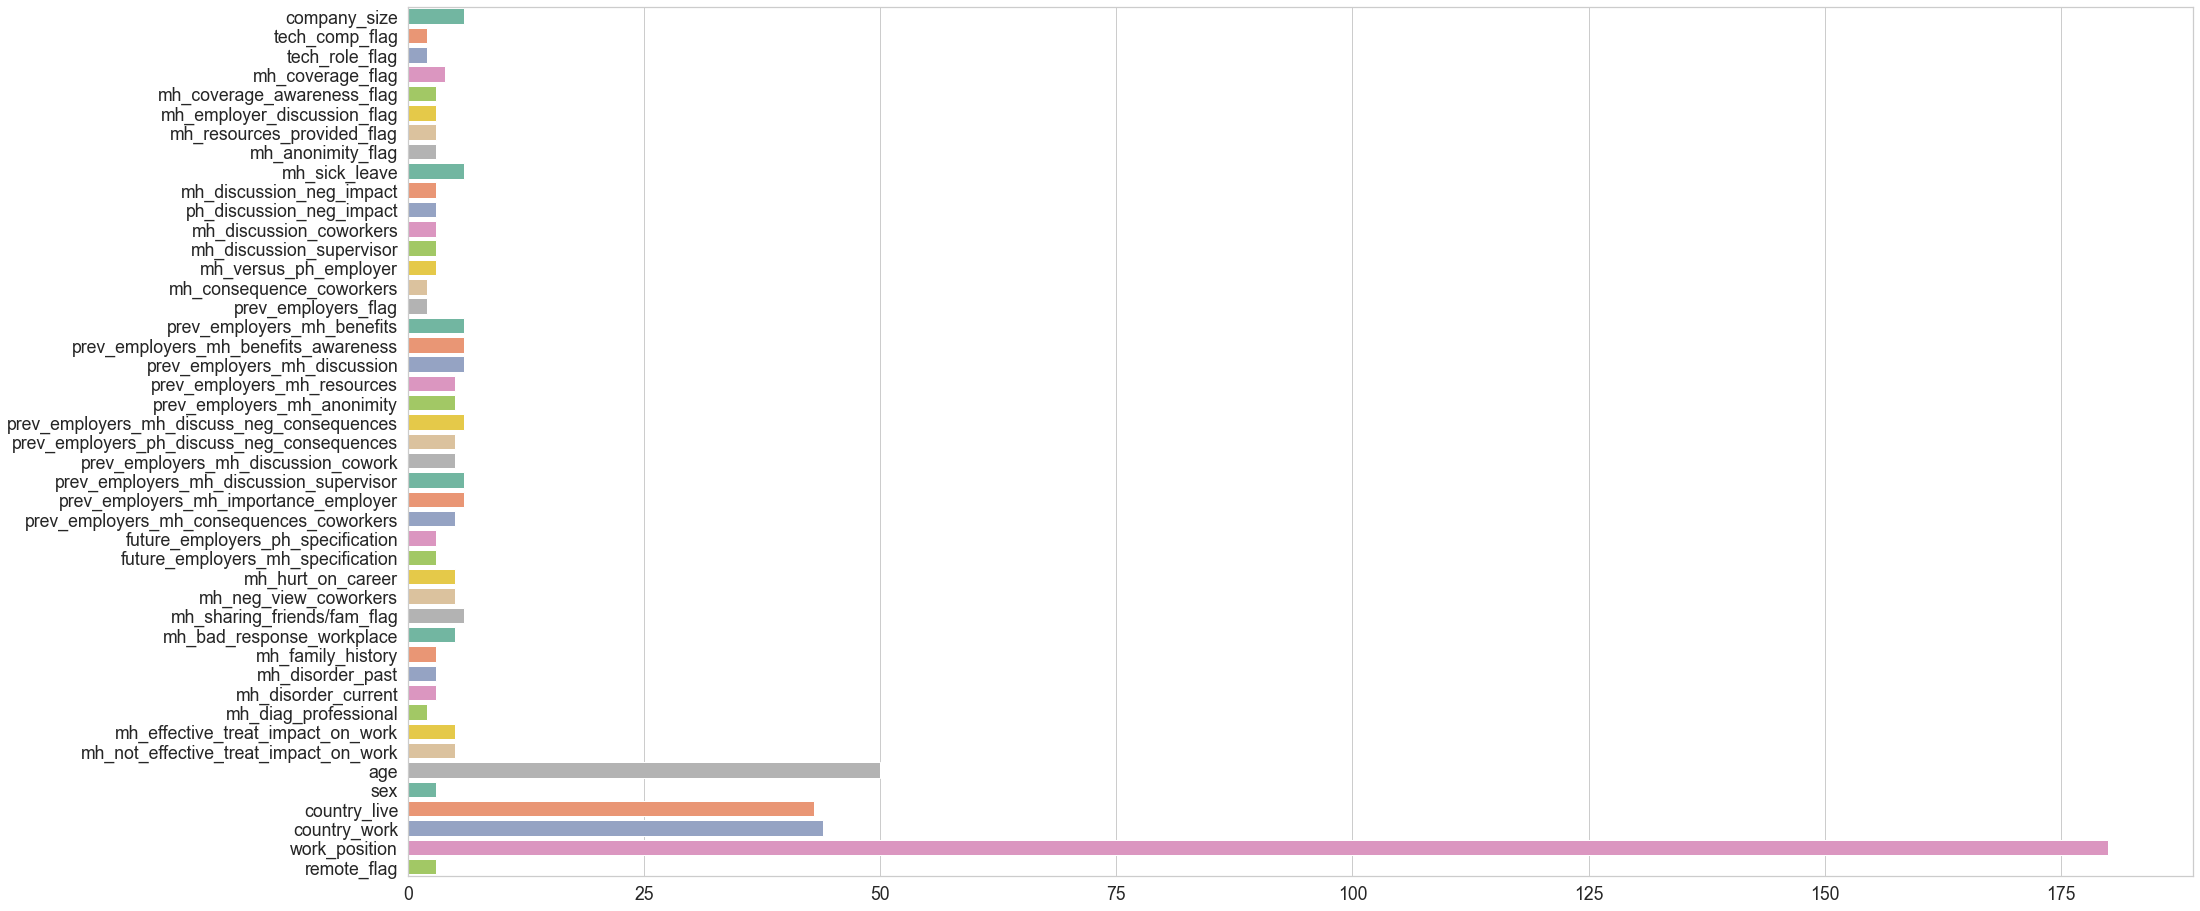

In [35]:
plt.figure(figsize=(32,16))
sns.color_palette("Set2")
keys = list(number_of_answers_dict.keys())
vals = list(number_of_answers_dict.values())
sns.barplot(x=vals, y=keys,palette="Set2")
plt.show()
# plt.savefig("Number_of_answers_per_column.png", dpi=300, format="png")

In [36]:
df.company_size.value_counts()

26-100            263
More than 1000    232
100-500           213
6-25              181
500-1000           68
1-5                49
Name: company_size, dtype: int64

In [37]:
df.company_size.replace(to_replace='More than 1000', value='>1000', inplace=True)

#### Standartizing Yes/NO answers
There are some columns that answer Yes and No Questions with 1/0 or Yes/No. Let's standartize the answer

In [38]:
df.head(3)

,company_size,tech_comp_flag,tech_role_flag,mh_coverage_flag,mh_coverage_awareness_flag,mh_employer_discussion_flag,mh_resources_provided_flag,mh_anonimity_flag,mh_sick_leave,mh_discussion_neg_impact,ph_discussion_neg_impact,mh_discussion_coworkers,mh_discussion_supervisor,mh_versus_ph_employer,mh_consequence_coworkers,prev_employers_flag,prev_employers_mh_benefits,prev_employers_mh_benefits_awareness,prev_employers_mh_discussion,prev_employers_mh_resources,prev_employers_mh_anonimity,prev_employers_mh_discuss_neg_consequences,prev_employers_ph_discuss_neg_consequences,prev_employers_mh_discussion_cowork,prev_employers_mh_discussion_supervisor,prev_employers_mh_importance_employer,prev_employers_mh_consequences_coworkers,future_employers_ph_specification,future_employers_mh_specification,mh_hurt_on_career,mh_neg_view_coworkers,mh_sharing_friends/fam_flag,mh_bad_response_workplace,mh_family_history,mh_disorder_past,mh_disorder_current,mh_diag_professional,mh_effective_treat_impact_on_work,mh_not_effective_treat_impact_on_work,age,sex,country_live,country_work,work_position,remote_flag
0,26-100,1.0,Yes,Not eligible for coverage / N/A,Yes,No,No,I don't know,Very easy,No,No,Maybe,Yes,I don't know,No,1,"No, none did",N/A (not currently aware),I don't know,None did,I don't know,Some of them,None of them,Some of my previous employers,Some of my previous employers,I don't know,None of them,Maybe,Maybe,Maybe,"No, I don't think they would",Somewhat open,No,No,Yes,No,Yes,Not applicable to me,Not applicable to me,39.0,male,UK,UK,Back-end Developer,Sometimes
1,6-25,1.0,Yes,No,Yes,Yes,Yes,Yes,Somewhat easy,No,No,Maybe,Yes,Yes,No,1,"Yes, they all did",I was aware of some,None did,Some did,"Yes, always",None of them,None of them,"No, at none of my previous employers",Some of my previous employers,Some did,None of them,Maybe,No,"No, I don't think it would","No, I don't think they would",Somewhat open,No,Yes,Yes,Yes,Yes,Rarely,Sometimes,29.0,male,USA,USA,Back-end Developer|Front-end Developer,Never
2,6-25,1.0,Yes,No,Yes,No,No,I don't know,Neither easy nor difficult,Maybe,No,Maybe,Maybe,I don't know,No,1,"No, none did",N/A (not currently aware),None did,Some did,I don't know,I don't know,Some of them,Some of my previous employers,I don't know,I don't know,Some of them,Yes,Yes,Maybe,Maybe,Somewhat open,Maybe/Not sure,No,Maybe,No,No,Not applicable to me,Not applicable to me,38.0,male,UK,UK,Back-end Developer,Always


In [39]:
df.tech_comp_flag = df.tech_comp_flag.replace({0:"No", 1:"Yes"})
df.prev_employers_flag = df.prev_employers_flag.replace({0:"No", 1:"Yes"})

#### Change dtype's of columns

In [40]:
list_category = []
list_numeric = []

for n in df.columns:
    if n == "age" or n =="work_position":
        pass
    else:
        df[n] = df[n].astype("category")

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1006 entries, 0 to 1432
Data columns (total 45 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   company_size                                1006 non-null   category
 1   tech_comp_flag                              1006 non-null   category
 2   tech_role_flag                              1006 non-null   category
 3   mh_coverage_flag                            1006 non-null   category
 4   mh_coverage_awareness_flag                  1006 non-null   category
 5   mh_employer_discussion_flag                 1006 non-null   category
 6   mh_resources_provided_flag                  1006 non-null   category
 7   mh_anonimity_flag                           1006 non-null   category
 8   mh_sick_leave                               1006 non-null   category
 9   mh_discussion_neg_impact                    1006 non-null   category
 10  

One of the benefits of dtype = "category" is the reduced storage which can be beneficial if more data is collected.

#### Add `leadership_flag` column

In [42]:
mask_leadership = df.work_position.str.contains('Supervisor|Team Lead|Lead|Leadership|Executive|Executive Leadership')
df["leadership_position"] = mask_leadership

In [43]:
df.leadership_position.replace({False:"No", True:"Yes"},inplace=True)

# Exploratory Data Analysis
Let's get a overview of the data

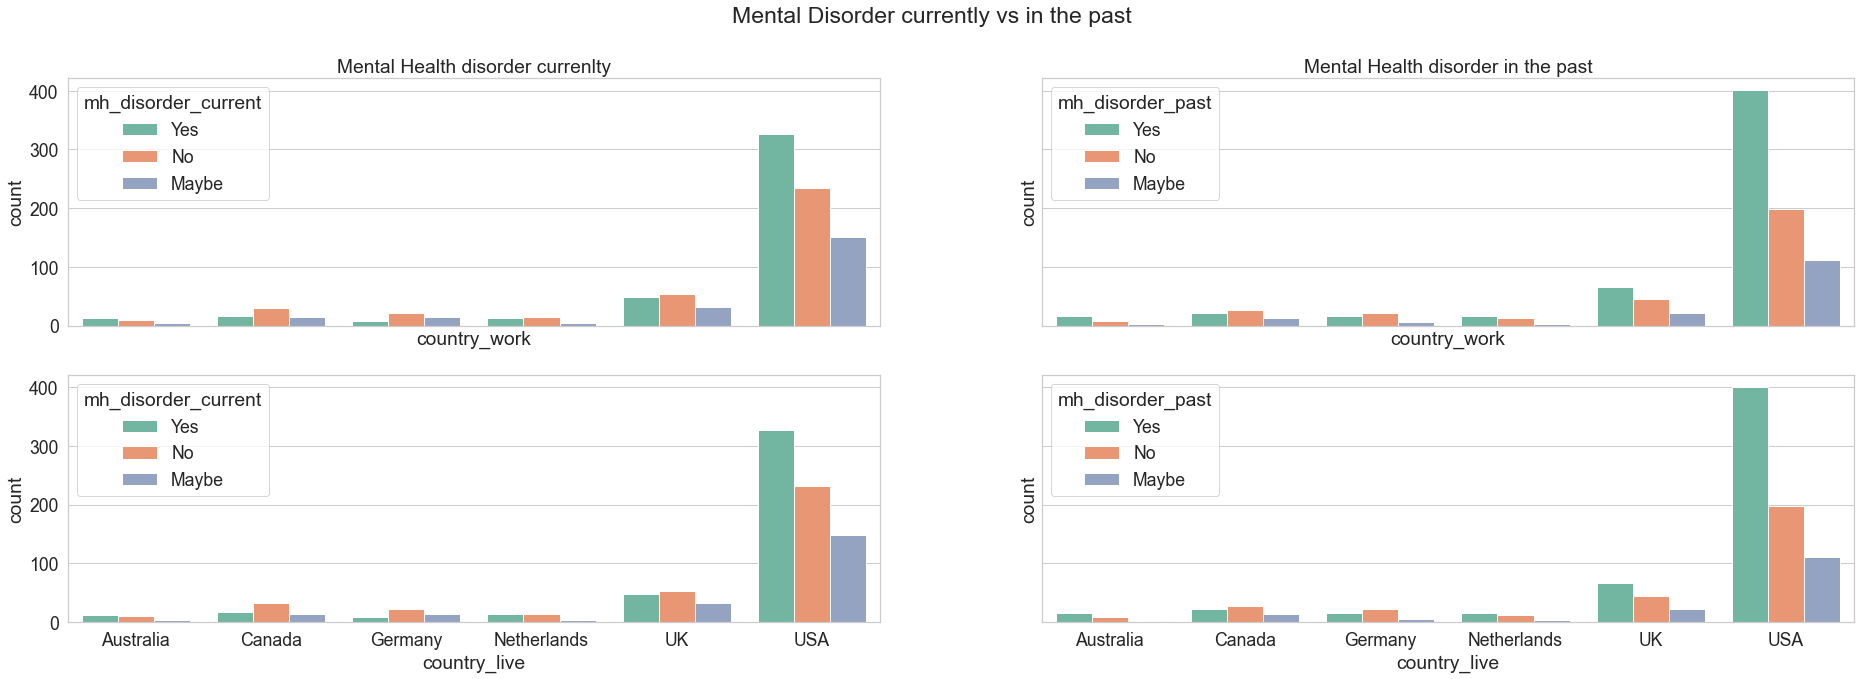

In [44]:
fig, ax = plt.subplots(2,2, figsize=(32,10),sharey=True,sharex=True)
fig.suptitle('Mental Disorder currently vs in the past')
ax[0,0].set_title('Mental Health disorder currenlty')
ax[0,1].set_title('Mental Health disorder in the past')
sns.set_style('whitegrid')
sns.set_palette('Set2')

sns.countplot(ax=ax[0,0], data=df, x="country_work", hue="mh_disorder_current",palette="Set2",
              hue_order=["Yes","No","Maybe"])
sns.countplot(ax=ax[0,1], data=df, x="country_work", hue="mh_disorder_past",palette="Set2",
             hue_order=["Yes","No","Maybe"])
sns.countplot(ax=ax[1,0], data=df, x="country_live", hue="mh_disorder_current",palette="Set2",
              hue_order=["Yes","No","Maybe"])
sns.countplot(ax=ax[1,1], data=df, x="country_live", hue="mh_disorder_past",palette="Set2",
             hue_order=["Yes","No","Maybe"])
plt.show()

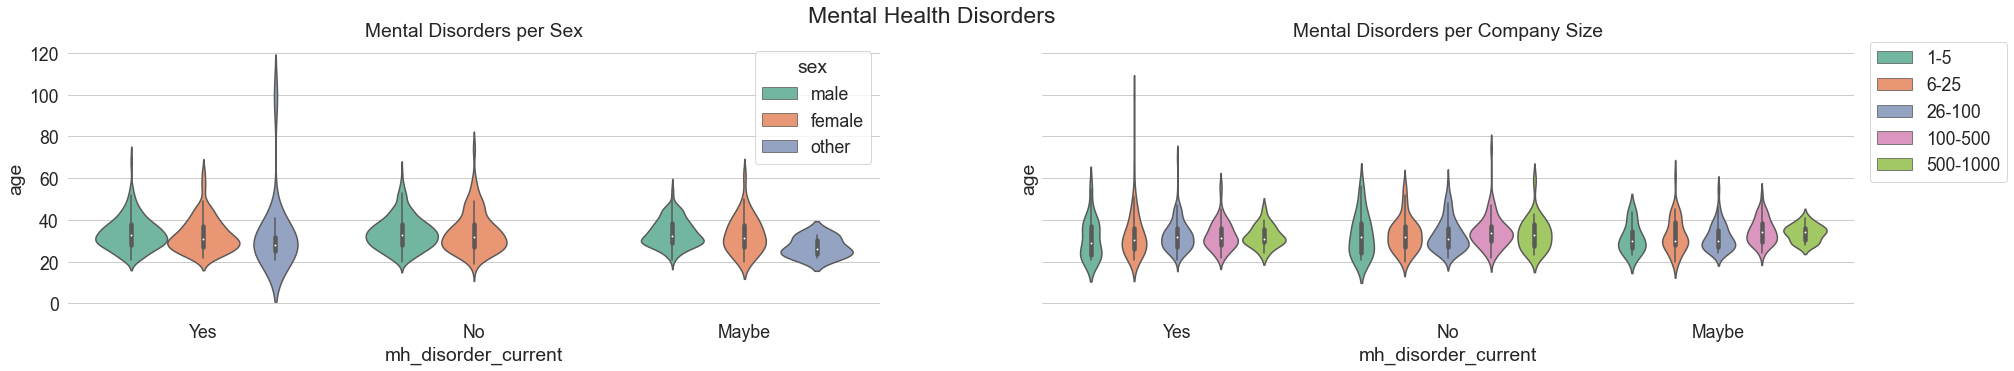

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(32, 5),sharey=True)
fig.suptitle('Mental Health Disorders')
ax[1].set_title('Mental Disorders per Company Size')
ax[0].set_title('Mental Disorders per Sex')


sns.violinplot(ax=ax[1], data=df, x="mh_disorder_current", y="age", hue="company_size", palette="Set2",
                  order=["Yes","No","Maybe"],hue_order=["1-5","6-25","26-100","100-500","500-1000"])
sns.violinplot(ax=ax[0], data=df, x="mh_disorder_current", y="age", hue="sex", palette="Set2",
                 order=["Yes","No","Maybe"],hue_order=["male","female","other"])

ax[1].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
plt.show()

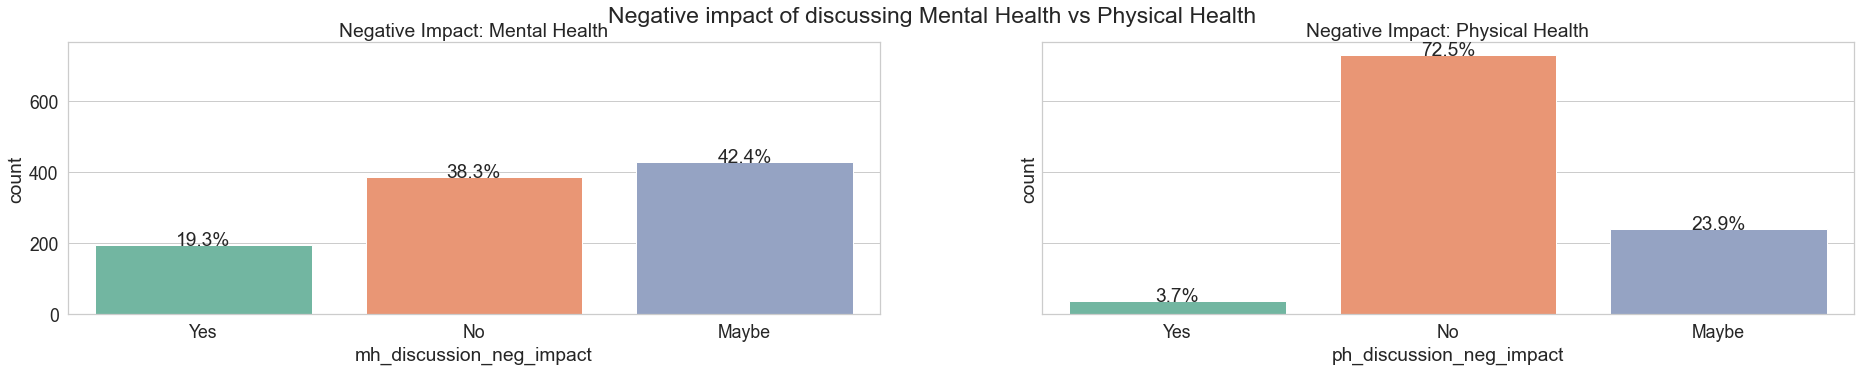

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(32, 5),sharey=True)
fig.suptitle('Negative impact of discussing Mental Health vs Physical Health')
ax[0].set_title('Negative Impact: Mental Health')
ax[1].set_title('Negative Impact: Physical Health')

sns.countplot(ax=ax[0],data=df, x="mh_discussion_neg_impact", order=["Yes","No","Maybe"])
sns.countplot(ax=ax[1],data=df, x="ph_discussion_neg_impact", order=["Yes","No","Maybe"])

total = float(len(df))
for p in ax[0].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax[0].annotate(percentage, (x, y),ha='center', va='baseline')

for p in ax[1].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax[1].annotate(percentage, (x, y),ha='center', va='baseline')
plt.show()

The employees believe that physical health leaves have less impact on their careers/jobs than mental health leaves.

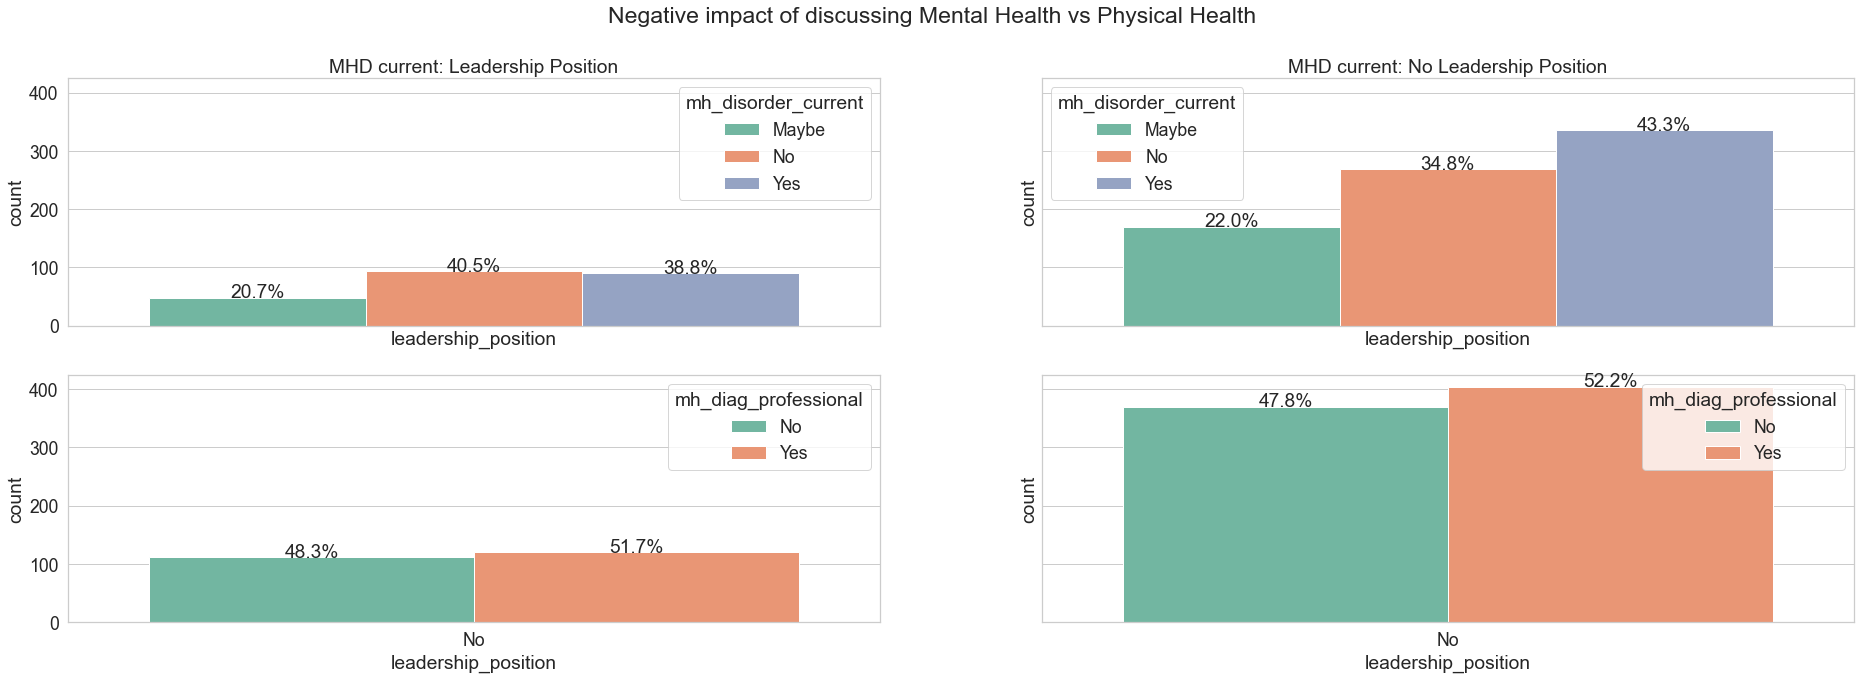

In [47]:
fig, ax = plt.subplots(2, 2, figsize=(32, 10),sharey=True, sharex=True)
fig.suptitle('Negative impact of discussing Mental Health vs Physical Health')

ax[0,0].set_title('MHD current: Leadership Position')
ax[0,1].set_title('MHD current: No Leadership Position')

sns.countplot(ax=ax[0,0], data=df, x=df.leadership_position[df["leadership_position"]=="Yes"], hue="mh_disorder_current")
sns.countplot(ax=ax[0,1], data=df, x=df.leadership_position[df["leadership_position"]=="No"], hue="mh_disorder_current")
sns.countplot(ax=ax[1,0], data=df, x=df.leadership_position[df["leadership_position"]=="Yes"], hue="mh_diag_professional")
sns.countplot(ax=ax[1,1], data=df, x=df.leadership_position[df["leadership_position"]=="No"], hue="mh_diag_professional")

total_leadership_position = len(df[df.leadership_position == "Yes"])
total_no_leadership_position = len(df[df.leadership_position == "No"])

for p in ax[0,0].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_leadership_position)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax[0,0].annotate(percentage, (x, y),ha='center', va='baseline')

for p in ax[0,1].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_no_leadership_position)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax[0,1].annotate(percentage, (x, y),ha='center', va='baseline')

for p in ax[1,0].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_leadership_position)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax[1,0].annotate(percentage, (x, y),ha='center', va='baseline')

for p in ax[1,1].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_no_leadership_position)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax[1,1].annotate(percentage, (x, y),ha='center', va='baseline')
plt.show()

30% of all surveytakers have some sort of leadership position in their respective jobs. According to the survey, employees who function as leaders have a 6% higher occurance of having a mental health disorder.

# Encode features

In [53]:
list_nominal_columns = [
    "tech_comp_flag", "tech_role_flag", "mh_coverage_awareness_flag", "mh_employer_discussion_flag", "mh_resources_provided_flag",
    "mh_anonimity_flag", "mh_discussion_neg_impact", "ph_discussion_neg_impact", "mh_discussion_coworkers", "mh_discussion_supervisor",
    "mh_versus_ph_employer", "mh_consequence_coworkers", "prev_employers_flag", "future_employers_ph_specification", 
    "future_employers_mh_specification", "mh_family_history", "mh_disorder_past", "mh_disorder_current", "mh_diag_professional",
    "country_live", "country_work", "leadership_position"
]

list_ordinal_columns = [
    "company_size", "mh_coverage_flag", "mh_sick_leave", "prev_employers_mh_benefits_awareness", "prev_employers_mh_discussion", 
    "prev_employers_mh_resources", "prev_employers_mh_anonimity", "prev_employers_mh_discuss_neg_consequences",
    "prev_employers_ph_discuss_neg_consequences", "prev_employers_mh_discussion_cowork", "mh_hurt_on_career", "mh_neg_view_coworkers",
    "mh_sharing_friends/fam_flag", "mh_bad_response_workplace", "mh_effective_treat_impact_on_work", "mh_not_effective_treat_impact_on_work",
    "remote_flag",
]

,company_size,tech_comp_flag,tech_role_flag,mh_coverage_flag,mh_coverage_awareness_flag,mh_employer_discussion_flag,mh_resources_provided_flag,mh_anonimity_flag,mh_sick_leave,mh_discussion_neg_impact,ph_discussion_neg_impact,mh_discussion_coworkers,mh_discussion_supervisor,mh_versus_ph_employer,mh_consequence_coworkers,prev_employers_flag,prev_employers_mh_benefits,prev_employers_mh_benefits_awareness,prev_employers_mh_discussion,prev_employers_mh_resources,prev_employers_mh_anonimity,prev_employers_mh_discuss_neg_consequences,prev_employers_ph_discuss_neg_consequences,prev_employers_mh_discussion_cowork,prev_employers_mh_discussion_supervisor,prev_employers_mh_importance_employer,prev_employers_mh_consequences_coworkers,future_employers_ph_specification,future_employers_mh_specification,mh_hurt_on_career,mh_neg_view_coworkers,mh_sharing_friends/fam_flag,mh_bad_response_workplace,mh_family_history,mh_disorder_past,mh_disorder_current,mh_diag_professional,mh_effective_treat_impact_on_work,mh_not_effective_treat_impact_on_work,age,sex,country_live,country_work,work_position,remote_flag,leadership_position
0,26-100,Yes,Yes,Not eligible for coverage / N/A,Yes,No,No,I don't know,Very easy,No,No,Maybe,Yes,I don't know,No,Yes,"No, none did",N/A (not currently aware),I don't know,None did,I don't know,Some of them,None of them,Some of my previous employers,Some of my previous employers,I don't know,None of them,Maybe,Maybe,Maybe,"No, I don't think they would",Somewhat open,No,No,Yes,No,Yes,Not applicable to me,Not applicable to me,39.0,male,UK,UK,Back-end Developer,Sometimes,No
1,6-25,Yes,Yes,No,Yes,Yes,Yes,Yes,Somewhat easy,No,No,Maybe,Yes,Yes,No,Yes,"Yes, they all did",I was aware of some,None did,Some did,"Yes, always",None of them,None of them,"No, at none of my previous employers",Some of my previous employers,Some did,None of them,Maybe,No,"No, I don't think it would","No, I don't think they would",Somewhat open,No,Yes,Yes,Yes,Yes,Rarely,Sometimes,29.0,male,USA,USA,Back-end Developer|Front-end Developer,Never,No
2,6-25,Yes,Yes,No,Yes,No,No,I don't know,Neither easy nor difficult,Maybe,No,Maybe,Maybe,I don't know,No,Yes,"No, none did",N/A (not currently aware),None did,Some did,I don't know,I don't know,Some of them,Some of my previous employers,I don't know,I don't know,Some of them,Yes,Yes,Maybe,Maybe,Somewhat open,Maybe/Not sure,No,Maybe,No,No,Not applicable to me,Not applicable to me,38.0,male,UK,UK,Back-end Developer,Always,No
4,6-25,No,Yes,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,Maybe,Maybe,No,No,No,Yes,I don't know,N/A (not currently aware),Some did,None did,I don't know,Some of them,Some of them,"No, at none of my previous employers",Some of my previous employers,Some did,Some of them,Maybe,No,"Yes, I think it would",Maybe,Somewhat open,"Yes, I experienced",Yes,Yes,Yes,Yes,Sometimes,Sometimes,43.0,female,USA,USA,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes,Yes
5,>1000,Yes,Yes,Yes,I am not sure,No,Yes,Yes,Somewhat easy,Yes,Yes,Maybe,Yes,No,Yes,Yes,"No, none did","Yes, I was aware of all of them",None did,None did,I don't know,"Yes, all of them",Some of them,"No, at none of my previous employers","No, at none of my previous employers",None did,Some of them,Yes,Maybe,"Yes, I think it would",Maybe,Somewhat open,"Yes, I experienced",No,No,Yes,No,Not applicable to me,Often,42.0,male,UK,UK,DevOps/SysAdmin|Support|Back-end Developer|Fro...,Sometimes,No


In [140]:
# Encode nominal values
encoded_df_nominal = df.copy().loc[:,list_nominal_columns]
encoded_df_nominal = ce.OneHotEncoder(verbose=1).fit_transform(encoded_df_nominal, axis=1,inplace=True)
#Encode ordinal values
encoded_df_ordinal = df.copy().loc[:,list_ordinal_columns]
encoded_df_ordinal = ce.OrdinalEncoder(verbose=1).fit_transform(encoded_df_ordinal, axis=1,inplace=True)
# concat new dataframes
encoded_df = pd.concat([encoded_df_nominal,encoded_df_ordinal], axis=1)
# Add only integer column from original df `age`
encoded_df["age"] = df.age


In [141]:
encoded_df.head()

,tech_comp_flag_1,tech_comp_flag_2,tech_role_flag_1,tech_role_flag_2,mh_coverage_awareness_flag_1,mh_coverage_awareness_flag_2,mh_coverage_awareness_flag_3,mh_employer_discussion_flag_1,mh_employer_discussion_flag_2,mh_employer_discussion_flag_3,mh_resources_provided_flag_1,mh_resources_provided_flag_2,mh_resources_provided_flag_3,mh_anonimity_flag_1,mh_anonimity_flag_2,mh_anonimity_flag_3,mh_discussion_neg_impact_1,mh_discussion_neg_impact_2,mh_discussion_neg_impact_3,ph_discussion_neg_impact_1,ph_discussion_neg_impact_2,ph_discussion_neg_impact_3,mh_discussion_coworkers_1,mh_discussion_coworkers_2,mh_discussion_coworkers_3,mh_discussion_supervisor_1,mh_discussion_supervisor_2,mh_discussion_supervisor_3,mh_versus_ph_employer_1,mh_versus_ph_employer_2,mh_versus_ph_employer_3,mh_consequence_coworkers_1,mh_consequence_coworkers_2,prev_employers_flag_1,prev_employers_flag_2,future_employers_ph_specification_1,future_employers_ph_specification_2,future_employers_ph_specification_3,future_employers_mh_specification_1,future_employers_mh_specification_2,future_employers_mh_specification_3,mh_family_history_1,mh_family_history_2,mh_family_history_3,mh_disorder_past_1,mh_disorder_past_2,mh_disorder_past_3,mh_disorder_current_1,mh_disorder_current_2,mh_disorder_current_3,mh_diag_professional_1,mh_diag_professional_2,country_live_1,country_live_2,country_live_3,country_live_4,country_live_5,country_live_6,country_work_1,country_work_2,country_work_3,country_work_4,country_work_5,country_work_6,leadership_position_1,leadership_position_2,company_size,mh_coverage_flag,mh_sick_leave,prev_employers_mh_benefits_awareness,prev_employers_mh_discussion,prev_employers_mh_resources,prev_employers_mh_anonimity,prev_employers_mh_discuss_neg_consequences,prev_employers_ph_discuss_neg_consequences,prev_employers_mh_discussion_cowork,mh_hurt_on_career,mh_neg_view_coworkers,mh_sharing_friends/fam_flag,mh_bad_response_workplace,mh_effective_treat_impact_on_work,mh_not_effective_treat_impact_on_work,remote_flag,age
0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,39.0
1,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,2,2,2,2,2,2,2,2,1,2,2,1,1,1,2,2,2,29.0
2,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,2,2,3,1,2,2,1,3,2,1,1,2,1,2,1,1,3,38.0
4,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,2,3,3,1,3,1,1,1,2,2,3,2,1,3,3,2,1,43.0
5,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,3,3,2,3,2,1,1,4,2,2,3,2,1,3,1,3,1,42.0


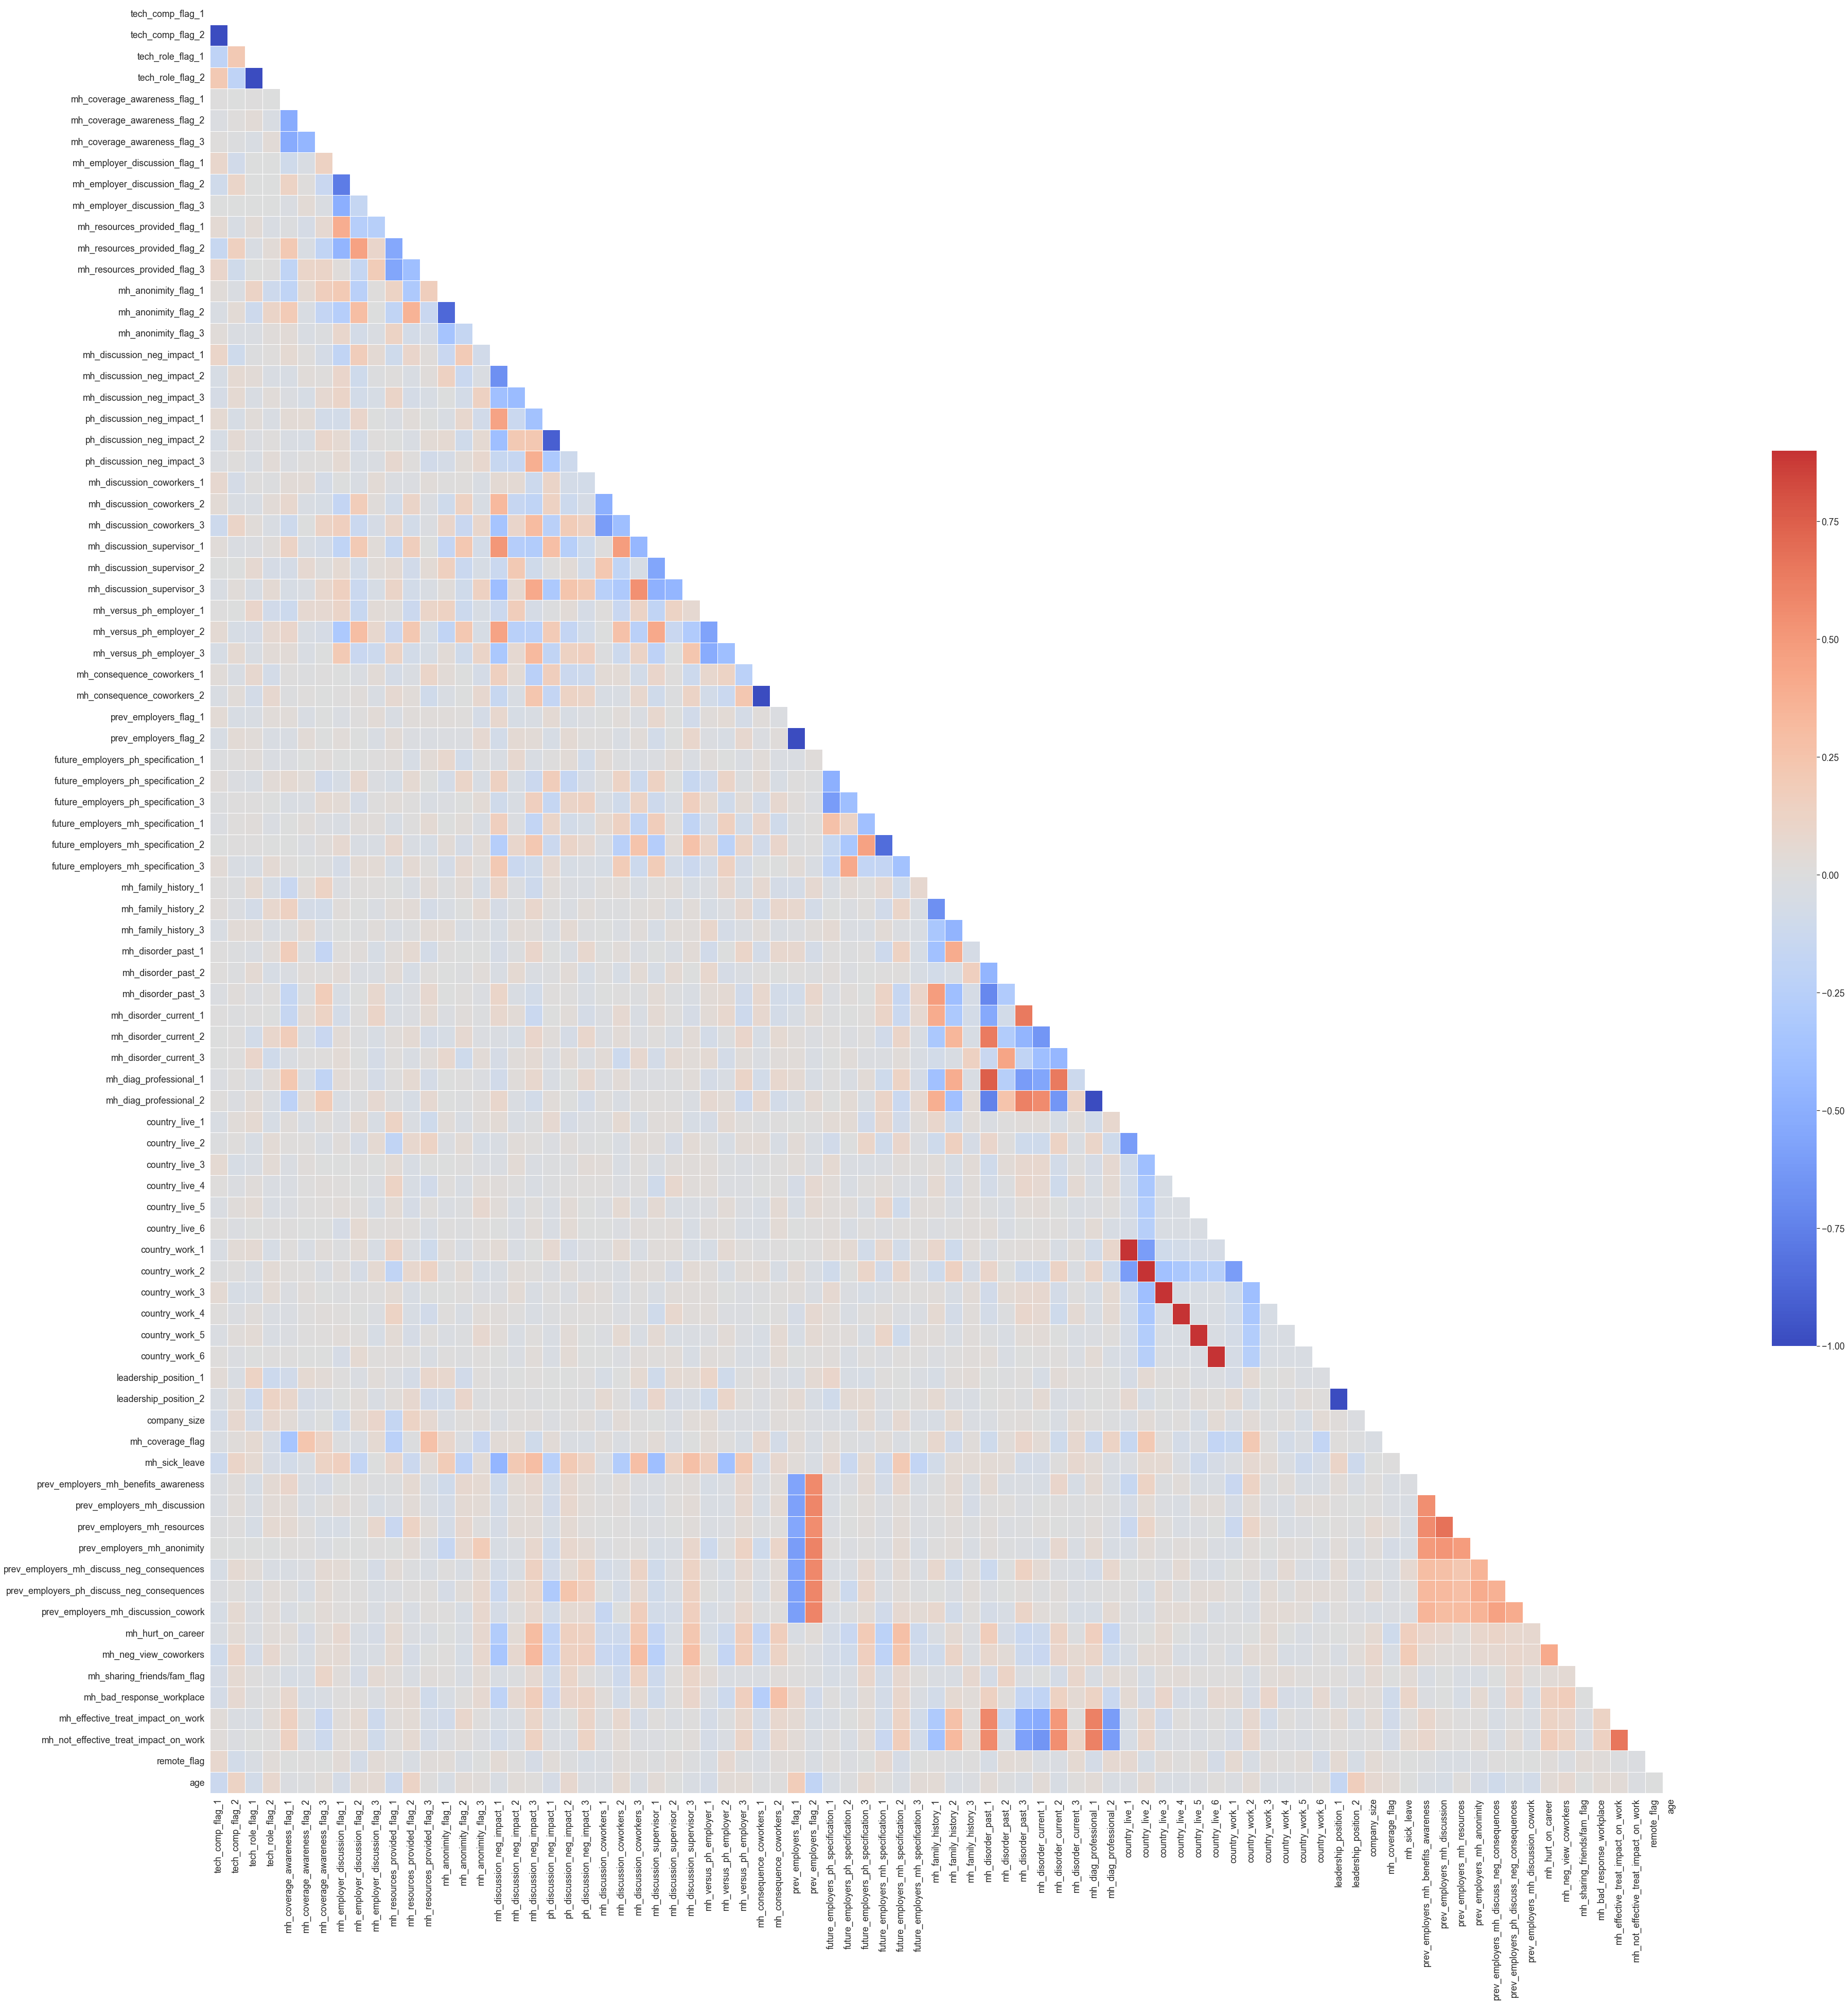

In [139]:
corr = encoded_df.corr(method ='spearman')
mask_1 = np.zeros_like(corr, dtype=bool)
mask_1[np.triu_indices_from(mask_1)] = True
fig, ax = plt.subplots(figsize=(64, 64))
sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(corr, mask=mask_1, cmap="coolwarm", vmax=.9, center=0, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [84]:
encoded_df.shape

(1006, 84)

In [135]:
# Now we will look at the correlation between the target variable with all other variables.

correlations = encoded_df.corr().unstack().sort_values(ascending=False) # Building correlation matrix
correlations = pd.DataFrame(correlations).reset_index() # Converting to dataframe
correlations.columns = ['X', 'y', 'correlation'] # Labeling the columns for easier processing
correlations.query("X == 'mh_disorder_current_1' & y != 'mh_disorder_current_1'").nlargest(10,columns="correlation").nlargest(n=10,columns="correlation") # Filtering by variable treatment


,X,y,correlation
